# OLAWALE PAUL OYADEYI 


### Project Background Information.
Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having been conducted in 2021. The purpose of such a census is to compare different people across the nation and to provide the government with accurate statistics of the population to enable better planning, to develop policies, and to allocate certain funding.
In the project, you will be provided with a mock census of an imaginary modest town. I would like you to consider yourselves to be part of a local government team who will be making decisions on what to do with an unoccupied plot of land and what to invest in.

In [294]:
import numpy as np #Data preprocessing package 
import pandas as pd #Data preprocessing Package 
import matplotlib.pyplot as plt #visualization package 
import seaborn as sns #visualization package 
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# DATA EXPLORATION  

In [295]:
"""From a classical look into the read in Census data below we could see that there is an index column: "Unnamed" which 
will have to be dropped as Pandas will create its own default index column"""
df = pd.read_csv("census_09_2022.csv") #Load Census Data (Census Data - 9 )
df.head() #Accessing the Data first five rows 

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,April Lodge,Brett,Webb,69,Head,Widowed,Male,Retired Customer service manager,None,Christian
1,1,2,April Lodge,Matthew,Hill,82,Head,Married,Male,Retired English as a second language teacher,None,Christian
2,2,2,April Lodge,Cheryl,Hill,80,Wife,Married,Female,Retired IT technical support officer,None,Christian
3,3,3,April Lodge,Louis,Scott,33,Head,Married,Male,Control and instrumentation engineer,None,None
4,4,3,April Lodge,Shannon,Scott,29,Wife,Married,Female,"Psychologist, prison and probation services",None,None


In [296]:
df.drop("Unnamed: 0", axis = 1, inplace = True) #Drop the Unnamed column 
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,April Lodge,Brett,Webb,69,Head,Widowed,Male,Retired Customer service manager,None,Christian
1,2,April Lodge,Matthew,Hill,82,Head,Married,Male,Retired English as a second language teacher,None,Christian
2,2,April Lodge,Cheryl,Hill,80,Wife,Married,Female,Retired IT technical support officer,None,Christian
3,3,April Lodge,Louis,Scott,33,Head,Married,Male,Control and instrumentation engineer,None,None
4,3,April Lodge,Shannon,Scott,29,Wife,Married,Female,"Psychologist, prison and probation services",None,None


In [297]:
df.shape #Data shape is of 11296 x 11 shape 

(11296, 11)

In [298]:
'''Upon accessing the Dataframe, it can be seen that the Age Data Column which is meant to be an int is an Object or string and 
same for Street number; hence, this Data attributes would be looked into for cleaning. 
'''
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   11296 non-null  object
 1   Street                         11296 non-null  object
 2   First Name                     11296 non-null  object
 3   Surname                        11296 non-null  object
 4   Age                            11296 non-null  object
 5   Relationship to Head of House  11296 non-null  object
 6   Marital Status                 8408 non-null   object
 7   Gender                         11296 non-null  object
 8   Occupation                     11296 non-null  object
 9   Infirmity                      11296 non-null  object
 10  Religion                       8349 non-null   object
dtypes: object(11)
memory usage: 970.9+ KB


In [299]:
df.duplicated().sum()

0

In [300]:
df.isnull().sum() #function Checks for missing values 

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2888
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2947
dtype: int64

# DATA CLEANING

###  AGE DATA COLUMN CLEANING  

In [301]:
df["Age"].unique()

array(['69', '82', '80', '33', '29', '55', '38', '28', '47', '39', '8',
       '6', '20', '23', '43', '63', '57', '19', '32', '22', '41', '44',
       '14', '58', '24', '51', '48', '30', '27', '5', '74', '73', '71',
       '75', '15', '42', '46', '2', '49', '17', '62', '61', '31', '78',
       '25', '68', '66', '18', '7', '40', '36', '12', '16', '35', '34',
       '1', '10', '59', '13', '9', '64', '50', '81', '56', '4', '26',
       '54', '11', '67', '53', '52', '21', '65', '3', '0', '72', '76',
       '75.52556518', '77.52556518', '37', '45', '77', '98', '96', '95',
       '60', '87', '89', '70', '84', '79', '83', '85', '94', '104', '88',
       '93', '58.88726261', '59.88726261', '81.44251982', '79.44251982',
       '102', '110', '97', '86', '53.34938183', '49.34938183', '91',
       '61.19850225', '63.19850225', '68.8413422', '101', '92',
       '73.77655042', '74.77655042', 'Twenty', '99', '103', '90', '105',
       '50.65178976', '76.35586495', '77.35586495'], dtype=object)

In [302]:
df["Age"].replace('Twenty', 20, inplace=True)   #Replace string with integer

In [303]:
df["Age"]= df["Age"].astype(float).astype(int) #Convert datatypes to integer

In [304]:
df["Age"].describe() 
#Get the descriptive statistics of the Age Data Attribute to confirm count aligns with the Dataframe rows (11296)

count    11296.000000
mean        34.876948
std         21.451678
min          0.000000
25%         17.000000
50%         34.000000
75%         50.000000
max        110.000000
Name: Age, dtype: float64

In [305]:
df_Adults = df[df["Age"]>=18] #Adult Dataframe 
df_Children = df[df["Age"]<18] #Children Dataframe 

### GENDER DATA COLUMN CLEANING 

In [306]:
df["Gender"].value_counts()

Female    5667
Male      5230
M           93
female      83
F           78
male        75
f           47
m           20
             3
Name: Gender, dtype: int64

In [307]:
df.loc[df["Gender"]==" ",:]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1554,22,Grant Avenue,Damian,Morgan,13,Son,NaN,,Student,None,NaN
2680,144,Jenkins Lane,Craig,Nelson,37,None,Single,,Hydrologist,None,Christian
5203,7,Wood Harbors,Charles,Roberts,38,Partner,Single,,Lawyer,None,None


In [308]:
df["Gender"].unique()

array(['Male', 'Female', 'M', 'F', 'male', 'female', 'f', 'm', ' '],
      dtype=object)

In [309]:
'''Since Female has the highest mode; then, the there(3) non-categorised gender will be replaced with Female'''

dict_Sex = {"M": "Male", "male": "Male", "f": "Female", "m": "Male",  "F": "Female", ' ':"Male" }
df["Gender"].replace(dict_Sex, inplace=True)

In [310]:
df["Gender"]= df["Gender"].str.capitalize()

In [311]:
df["Gender"].describe() #This confirms that the gender series length equals the actual Dataframe count/length (11296)

count      11296
unique         2
top       Female
freq        5875
Name: Gender, dtype: object

In [312]:
df_Male = df[df["Gender"] =='Male'] #Male Dataframe
df_Female = df[df["Gender"] =='Female'] #Female Dataframe 

### MARITAL STATUS DATA COLUMN CLEANING 

In [313]:
df["Marital Status"].unique() #Get the Marital status categories 

array(['Widowed', 'Married', 'Single', nan, 'Divorced', 'W', 'S', 'D',
       'M'], dtype=object)

In [314]:
df["Marital Status"].value_counts() #Get the Marital status unique value count

Single      3995
Married     2878
Divorced    1103
Widowed      409
W              7
S              7
M              6
D              3
Name: Marital Status, dtype: int64

In [315]:
dict_Marital_status = { "S": "Single", "D": "Divorced","M": "Married","W": "Widowed"}

In [316]:
df["Marital Status"].replace(dict_Marital_status, inplace = True)

In [317]:
df[(df["Marital Status"].isnull()) & (df["Age"] >= 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [318]:
df[(df["Marital Status"].isnull()) & (df["Age"]<18)] 
#It can de deduced from this range that the missing category is of Age < 18; hence, Nan to be replaced with "None"

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,4,April Lodge,Nicole,Baker,8,Daughter,NaN,Female,Student,None,NaN
11,4,April Lodge,Ronald,Baker,8,Son,NaN,Male,Student,None,NaN
12,4,April Lodge,Carole,Baker,6,Daughter,NaN,Female,Student,None,NaN
28,9,April Lodge,Lindsey,Parsons,14,Daughter,NaN,Female,Student,None,NaN
40,12,April Lodge,Debra,Jones,5,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11252,1,Exeter Abbey,Lawrence,Begum,1,Son,NaN,Male,Child,None,NaN
11271,1,Newcastle Stables,Julie,Barber,1,Daughter,NaN,Female,Child,None,NaN
11286,1,Williams Hold,Dorothy,French,7,Daughter,NaN,Female,Student,None,NaN
11287,1,Williams Hold,Laura,French,4,Daughter,NaN,Female,Child,None,NaN


In [319]:
df.loc[(df["Marital Status"].isnull()) & (df["Age"]<18), "Marital Status"] = "N/A"

In [320]:
df[(df["Marital Status"].isnull()) & (df["Age"]<18)]["Marital Status"]

Series([], Name: Marital Status, dtype: object)

In [321]:
df["Marital Status"].describe() #This confirms that the Marital series length equals the actual Dataframe count/length (11296)

count      11296
unique         5
top       Single
freq        4002
Name: Marital Status, dtype: object

In [322]:
df["Marital Status"].unique()

array(['Widowed', 'Married', 'Single', 'N/A', 'Divorced'], dtype=object)

In [323]:
df["Marital Status"]= df["Marital Status"].str.capitalize()

###  RELIGION DATA COLUMN CLEANING 

In [324]:
df["Religion"].value_counts()

None           3741
Christian      2426
Catholic       1158
Methodist       768
Muslim          142
Sikh             72
Jewish           29
Jedi              4
Housekeeper       4
                  1
Orthodoxy         1
Undecided         1
Agnostic          1
Bahai             1
Name: Religion, dtype: int64

In [325]:
df["Religion"].unique()

array(['Christian', 'None', 'Methodist', nan, 'Catholic', 'Sikh',
       'Muslim', 'Jewish', ' ', 'Jedi', 'Orthodoxy', 'Housekeeper',
       'Undecided', 'Agnostic', 'Bahai'], dtype=object)

In [326]:
df[(df["Religion"]==' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
663,1,Spencer Drive,Holly,Brown,64,Head,Married,Female,"Psychologist, forensic",None,


In [327]:
#assign None to the blank entry as i assume he do not practice any of the religion 
df.loc[(df["Religion"]==' ',"Religion") ] = 'None' 

In [328]:
df["Religion"].replace('Undecided', "None", inplace = True ) #Undecided to be replaced with None 
df["Religion"].replace("Housekeeper", "None", inplace = True) #problematic entry 

In [329]:
df_Adults = df[df["Age"]>=18] #Adult Dataframe 
df_Children = df[df["Age"]<18] #Children Dataframe 
df_Adults["Religion"].unique() #Category of Adult religion

array(['Christian', 'None', 'Methodist', 'Catholic', 'Sikh', 'Muslim',
       'Jewish', nan, 'Jedi', 'Orthodoxy', 'Agnostic', 'Bahai'],
      dtype=object)

In [330]:
df_Children["Religion"].unique()  #since only the children fall into nan Category, their religion to be replaced with N/A

array([nan], dtype=object)

In [331]:
df.loc[(df["Religion"].isnull(), "Religion")] = 'N/A'

In [332]:
df["Religion"].unique()

array(['Christian', 'None', 'Methodist', 'N/A', 'Catholic', 'Sikh',
       'Muslim', 'Jewish', 'Jedi', 'Orthodoxy', 'Agnostic', 'Bahai'],
      dtype=object)

In [333]:
df["Religion"].describe() #This confirms that the Religion series length equals the actual Dataframe count/length (11296)

count     11296
unique       12
top        None
freq       3747
Name: Religion, dtype: object

###  HOUSE NUMBER DATA COLUMN CLEANING

In [334]:
df["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [335]:
df["House Number"].replace('One', 1, inplace = True)

In [336]:
df["House Number"]=df["House Number"].astype(float).astype(int)

In [337]:
df["House Number"].describe()

count    11296.000000
mean        40.093661
std         43.271324
min          1.000000
25%         11.000000
50%         25.000000
75%         48.000000
max        220.000000
Name: House Number, dtype: float64

###  INFIRMITY DATA COLUMN CLEANING

In [338]:
df["Infirmity"].unique()

array(['None', 'Mental Disability', ' ', 'Disabled',
       'Physical Disability', 'Blind', 'Unknown Infection', 'Deaf'],
      dtype=object)

In [339]:
df["Infirmity"].value_counts()

None                   11214
Physical Disability       26
Unknown Infection         13
Blind                     12
Mental Disability         11
                           7
Disabled                   7
Deaf                       6
Name: Infirmity, dtype: int64

In [340]:
df['Infirmity'].replace(' ', 'None', inplace = True)

In [341]:
df['Infirmity']= df['Infirmity'].astype(str)

In [342]:
df["Infirmity"].describe() #This confirms that all the length equals the actual Dataframe count/length (11296)

count     11296
unique        7
top        None
freq      11221
Name: Infirmity, dtype: object

###  FIRST NAME DATA COLUMN CLEANING

In [343]:
df["First Name"].unique()

array(['Brett', 'Matthew', 'Cheryl', 'Louis', 'Shannon', 'Wayne', 'Sian',
       'Kevin', 'Scott', 'Sylvia', 'Nicole', 'Ronald', 'Carole', 'Shaun',
       'Victoria', 'Ashleigh', 'Maurice', 'Abbie', 'Megan', 'Angela',
       'Gerald', 'Marian', 'Danielle', 'Russell', 'Samuel', 'Caroline',
       'Paula', 'Reece', 'Lindsey', 'Trevor', 'Dawn', 'Jodie', 'Dale',
       'Elliot', 'Sarah', 'Rebecca', 'Shane', 'Aaron', 'Debra', 'Jessica',
       'Abdul', 'Lawrence', 'Charlene', 'Allan', 'Danny', 'Andrea',
       'Dominic', 'Dean', 'Lydia', 'Glenn', 'Frances', 'Jennifer',
       'Jenna', 'Iain', 'Kelly', 'Jasmine', 'Brenda', 'Jean', 'Wendy',
       'Howard', 'Graham', 'Connor', 'Jacob', 'Gregory', 'Kimberley',
       'Josephine', 'Brian', 'Grace', 'Glen', 'Jordan', 'Christine',
       'Billy', 'Bruce', 'Declan', 'Stacey', 'Arthur', 'Anne', 'Lynn',
       'Norman', 'Kirsty', 'Edward', 'Bethany', 'Frederick', 'Owen',
       'Darren', 'Rhys', 'Marilyn', 'Julie', 'Mathew', 'Victor', 'Josh',
      

In [344]:
df[(df["First Name"].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [345]:
df[(df["First Name"]==' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [346]:
df["First Name"].describe() 
#This confirms length equals the actual Dataframe count/length (11296)

count       11296
unique        365
top       Suzanne
freq           52
Name: First Name, dtype: object

### RELATIONSHIP TO HEAD OF THE HOUSE COLUMN CLEANING  

In [347]:
df["Relationship to Head of House"].unique()

array(['Head', 'Wife', 'Lodger', 'Daughter', 'Son', 'Visitor', 'None',
       'Partner', 'Husband', 'Grandson', 'Adopted Son', 'Granddaughter',
       'Step-Daughter', 'Step-Son', 'Cousin', 'Nephew', 'Sibling',
       'Adopted Daughter', 'Neice', ' ', 'Daughter-in-law'], dtype=object)

In [348]:
df["Relationship to Head of House"].value_counts()

Head                3501
Son                 2174
Daughter            2042
Husband             1064
None                 784
Lodger               577
Wife                 367
Partner              302
Granddaughter        121
Grandson             112
Sibling               73
Cousin                41
Step-Daughter         29
Visitor               28
Adopted Daughter      28
Adopted Son           18
Step-Son              16
Neice                  9
Nephew                 8
                       1
Daughter-in-law        1
Name: Relationship to Head of House, dtype: int64

In [349]:
df.loc[(df["Relationship to Head of House"]=="Neice"), "Relationship to Head of House"] = 'Niece'

#### Confirming  children as head

In [350]:
df[(df["Relationship to Head of House"]=="Head") & (df["Age"]<18)]#Confirming we dont have children as head but we actually 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6840,50,Truro Walks,Annette,Clarke,15,Head,Married,Female,Student,None,N/A


In [351]:
# from relationship with other family members as called up below, Annette relationship to head is "Daughter" 
df_Adults[(df_Adults["Surname"]== 'Clarke') & (df["Street"]=="Truro Walks")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6748,22,Truro Walks,Emily,Clarke,30,Head,Single,Female,Freight forwarder,None,None
6841,50,Truro Walks,Daniel,Clarke,19,Husband,Married,Male,University Student,None,NaN


In [352]:
#Annette in Row 6840 relationship to head now Daughter 
df.loc[(df["Relationship to Head of House"]=="Head") & (df["Age"]<18), "Relationship to Head of House"] = 'Daughter' 

#### Confirming  children as wife

In [353]:
df[(df["Relationship to Head of House"]=="Wife") & (df["Age"]<18)] #None found 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### Confirming  children as Partner

In [354]:
df[(df["Relationship to Head of House"]=="Partner") & (df["Age"]<18)] #None found 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### Confirming  children as Daughter-in-law

In [355]:
df[(df["Relationship to Head of House"]=="Daughter-in-law") & (df["Age"]<18)] #None found 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [356]:
df[(df["Relationship to Head of House"]==" ")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3257,55,Bathhousenail Lane,Annette,Parker,54,,Single,Female,Chartered certified accountant,None,Christian


In [357]:
df[(df["Relationship to Head of House"]==" ") & (df["Surname"]=="Parker") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3257,55,Bathhousenail Lane,Annette,Parker,54,,Single,Female,Chartered certified accountant,None,Christian


In [358]:
#I assigned Parker the head as i cannot trace any common surname with it and considering the Age: 54, i concluded being Head 
df.loc[(df["Relationship to Head of House"]==" ") & (df["Surname"]=="Parker"),"Relationship to Head of House"]= "Head"

In [359]:
df[(df["Relationship to Head of House"]==" ") & (df["Surname"]=="Parker") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [360]:
df["Relationship to Head of House"]= df["Relationship to Head of House"].str.capitalize()

In [361]:
df["Relationship to Head of House"].describe() #This confirms length equals the actual Dataframe count/length (11296)

count     11296
unique       20
top        Head
freq       3501
Name: Relationship to Head of House, dtype: object

### STREET COLUMN CLEANING

In [362]:
df["Street"].unique()

array(['April Lodge', 'Brown Cove', 'Reindeer Canyon',
       'Coronation Turnpike', 'Honeysuckle Station', 'Lisbon Drive',
       'Edwards Run', 'Spencer Drive', 'Cameron Springs',
       'Phillips Motorway', 'Lavendar Oval', 'Cambridge Drive',
       'Dean Mews', 'Hedgehogloom Drive', 'Halfcrown Vista',
       'Jones Plain', 'Telegraph Port', 'Farthing Keys', 'Parrot Lane',
       'Bricknail Road', 'Grant Avenue', 'Octobervane Road',
       'Lancelot Island', 'Cancer Lane', 'Holyrood Lane', 'Jenkins Lane',
       'Daffodiltug Road', 'Norris Rest', 'Bathhousenail Lane',
       'Beverley Drive', 'Swanseabind Street', 'Smith Well',
       'Thistle Trafficway', 'Booth Avenue', 'Aries Lane', 'Wood Harbors',
       "O'Neill Drive", 'Thomas Center', 'Brown Summit', 'Wells Street',
       'Perry Drive', 'Patel Avenue', 'Sandy Drive', 'June Drive',
       'Reynolds Valleys', 'Ford Lake', 'Bathhouse Avenue',
       'Christmas Avenue', 'Owen Garden', 'Whittaker Manor',
       'Truro Walks', 'Ma

In [363]:
df[(df["Street"]==' ')] #Confirmed no blank entry 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [364]:
df[(df["Street"].isnull())] #confirmed no null values 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [365]:
df["Street"].describe() #This confirms length equals the actual Dataframe count/length (11296)

count              11296
unique               105
top       Beverley Drive
freq                 861
Name: Street, dtype: object

### SURNAME COLUMN CLEANING

In [366]:
df["Surname"].unique()

array(['Webb', 'Hill', 'Scott', 'Ball', 'Barnett', 'Williams', 'Baker',
       'Hayes', 'Patel', 'Mills', 'Davies', 'Lewis', 'Walker', 'Bibi',
       'Robertson', 'Hope', 'Bishop', 'Evans', "O'Donnell", 'Harrison',
       'Parsons', 'Bennett', 'Hopkins', 'Rogers', 'Jones', 'Day',
       'Holmes', 'Blackburn', 'Whitehead', 'Dawson', 'Hussain',
       'Davis-Jones', 'Davies-Carter', 'Storey', 'Smith', 'Connolly',
       'Cole-Connolly', 'Barber', 'Hunter', 'Roberts', 'Coleman',
       'Turnbull-Coleman', 'Turner', 'Nolan', 'Kerr', 'Stevens-Kerr',
       'Wells', 'Green', 'Ali', 'Clayton', 'Pugh', 'Ward-Pugh', 'Miah',
       'Ward', 'Brown', 'Lynch', 'Wood', 'Hayward', 'Herbert', 'Saunders',
       'Palmer', 'Johnson', 'Sims', 'Gibbs', 'Lawson', 'Riley', 'Simpson',
       'Foster', 'Benson', 'Kennedy', 'Chamberlain', 'Mann', 'Henderson',
       'Walton', 'Daniels', 'Harris', 'Brooks', 'Webster', 'Sheppard',
       'Rahman', 'Hunt-Rahman', 'Carter', 'Nelson', 'Butler', 'Barker',
       'Th

In [367]:
df[(df["Surname"] == ' ')] #Confirm we don not have blank entry for surname 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4895,31,Thistle Trafficway,Dean,,37,Head,Single,Male,Ambulance person,None,Christian


In [368]:
#From below, we can judge that the blank entry surname is stepenson  as both are partners and living in same house 
df [(df["Street"] =="Thistle Trafficway") & (df["House Number"]== 31)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4895,31,Thistle Trafficway,Dean,,37,Head,Single,Male,Ambulance person,None,Christian
4896,31,Thistle Trafficway,Naomi,Stephenson,36,Partner,Single,Female,Orthoptist,None,None


In [369]:
df["Surname"].replace(' ', 'Stephenson', inplace= True)

In [370]:
print(df[df["Surname"].isnull()].index.tolist()) #confirmed no null value

[]


In [371]:
df["Surname"] = df["Surname"].astype(str)

In [372]:
df["Surname"].describe()

count     11296
unique      717
top       Smith
freq        319
Name: Surname, dtype: object

### OCCUPATION COLUMN CLEANING

In [373]:
values = df["Occupation"].unique()
values

array(['Retired Customer service manager',
       'Retired English as a second language teacher',
       'Retired IT technical support officer', ...,
       'Retired Engineer, technical sales',
       'Retired Surveyor, hydrographic', 'Retired Marketing executive'],
      dtype=object)

In [374]:
for items in values: 
    print(items)

Retired Customer service manager
Retired English as a second language teacher
Retired IT technical support officer
Control and instrumentation engineer
Psychologist, prison and probation services
Theatre stage manager
Chartered management accountant
Radiation protection practitioner
Psychologist, occupational
Hydrogeologist
Student
Unemployed
Surgeon
Psychiatric nurse
Emergency planning/management officer
Aid worker
Clinical research associate
Further education lecturer
University Student
PhD Student
Psychologist, sport and exercise
Leisure centre manager
Diagnostic radiographer
Buyer, retail
Clinical embryologist
Patent examiner
Futures trader
Actor
Hydrographic surveyor
Architectural technologist
Television/film/video producer
Retired Associate Professor
Retired Animator
Geochemist
Retired Occupational psychologist
Retired Physiological scientist
Publishing copy
Fashion designer
Systems analyst
Medical physicist
Child
Government social research officer
Clinical psychologist
Engineer,

In [375]:
df[(df["Occupation"]==' ')] #2nos blank entries and  under age;hence, be placed in the student category 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
429,20,Honeysuckle Station,Marian,Thomson,5,Daughter,N/a,Female,,None,N/A
8169,17,Scotland Street,Alex,Coleman-Evans,10,Grandson,N/a,Male,,None,N/A


In [376]:
df.loc[(df["Occupation"]==' '),"Occupation" ] = "Student"  #empty entry replaced 

In [377]:
df[df["Occupation"].isnull()] #No NaN values 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [378]:
df['Occupation'].replace('Best boy', 'None', inplace = True)  #This must have been a wrong input, apply None 
df['Occupation'].replace('Copy', 'Copywriter', inplace = True) #correct copy with Copywriter, advertising in category
df['Occupation'].replace('Land', 'None', inplace = True) #Apply None as this is traceable to any category 
df['Occupation'].replace('Make', 'None', inplace = True) #Apply None here as value is inconsistent value 
df['Occupation'].replace('Sub', 'None', inplace = True) #Change to Sub to None since not in class 
df['Occupation'].replace('TEFL teacher', 'TOEFL Teacher', inplace = True) #Change TEFL teacher to TOEFL Teacher 

In [379]:
employmt_category = [] 
for work_class in df['Occupation']:
    if 'Retired' in work_class: 
        employmt_category.append('Retired') 
    elif work_class == 'None':
        employmt_category.append('Unemployed')
    elif work_class == 'Child':
        employmt_category.append('N/A')
    elif work_class == 'Student': 
        employmt_category.append('Student')
    elif work_class == 'University Student':
        employmt_category.append('University Student')
    elif work_class == 'Unemployed':
        employmt_category.append('Unemployed')
    else:
        employmt_category.append('Employed')

df['Employment category'] =  employmt_category  #Categorising the employment class into its category and updating into the Dataframe 

In [380]:
df['Employment category'].describe() #length same as the Dataframe 

count        11296
unique           6
top       Employed
freq          5938
Name: Employment category, dtype: object

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   11296 non-null  int32 
 1   Street                         11296 non-null  object
 2   First Name                     11296 non-null  object
 3   Surname                        11296 non-null  object
 4   Age                            11296 non-null  int32 
 5   Relationship to Head of House  11296 non-null  object
 6   Marital Status                 11296 non-null  object
 7   Gender                         11296 non-null  object
 8   Occupation                     11296 non-null  object
 9   Infirmity                      11296 non-null  object
 10  Religion                       11296 non-null  object
 11  Employment category            11296 non-null  object
dtypes: int32(2), object(10)
memory usage: 970.9+ KB


# INITIAL INSIGHT

###  AGE DISTRIBUTION OF POPULATION PLOTTING

In [382]:
'''In the first place, plotting the Age distribution of Population; we must know our dependecies for our Dataframe i.e 
The Age category or class, then the Female and Male Size '''

#Recall our Dataframe for Male and Female by Gender
df_Male =df[(df["Gender"] == "Male")]
df_Female = df[(df["Gender"]=="Female")]

In [383]:
#Get the Male size by Age range from the Population by finding through, the length/count of Male in each range 
M_size= [
len(df_Male[df_Male["Age"] <= 8]),
len(df_Male[(df_Male["Age"] > 8 ) & (df_Male["Age"] <= 17)]), 
len(df_Male[(df_Male["Age"] > 17) & (df_Male["Age"] <= 26)]),
len(df_Male[(df_Male["Age"] > 26) & (df_Male["Age"] <= 35)]),
len(df_Male[(df_Male["Age"] > 35) & (df_Male["Age"] <= 44)]),
len(df_Male[(df_Male["Age"] > 44) & (df_Male["Age"] <= 53)]),
len(df_Male[(df_Male["Age"] > 53) & (df_Male["Age"] <= 62)]),
len(df_Male[(df_Male["Age"] > 62) & (df_Male["Age"] <= 71)]),
len(df_Male[(df_Male["Age"] > 71) & (df_Male["Age"] <= 80)]),
len(df_Male[(df_Male["Age"] > 80) & (df_Male["Age"] <= 89)]),
len(df_Male[(df_Male["Age"] > 89) & (df_Male["Age"] <= 98)]),    
len(df_Male[df_Male["Age"] >98])
]
M_size

[708, 781, 733, 682, 770, 631, 513, 298, 189, 89, 22, 5]

In [384]:
#Since the Male will be on the negative side of the axis for the population pyramid, New list "Male_size" will hold it  
Male_size = [] 
for value in M_size: 
    value = 0-value
    Male_size.append(value)
Male_size 
    


[-708, -781, -733, -682, -770, -631, -513, -298, -189, -89, -22, -5]

In [385]:
#Get the female size by Age range from the Population by finding through, the length/count of Male in each ra
Female_size= [
len(df_Female[df_Female["Age"] <= 8]),
len(df_Female[(df_Female["Age"] > 8 ) & (df_Female["Age"] <= 17)]), 
len(df_Female[(df_Female["Age"] > 17) & (df_Female["Age"] <= 26)]),
len(df_Female[(df_Female["Age"] > 26) & (df_Female["Age"] <= 35)]),
len(df_Female[(df_Female["Age"] > 35) & (df_Female["Age"] <= 44)]),
len(df_Female[(df_Female["Age"] > 44) & (df_Female["Age"] <= 53)]),
len(df_Female[(df_Female["Age"] > 53) & (df_Female["Age"] <= 62)]),
len(df_Female[(df_Female["Age"] > 62) & (df_Female["Age"] <= 71)]),
len(df_Female[(df_Female["Age"] > 71) & (df_Female["Age"] <= 80)]),
len(df_Female[(df_Female["Age"] > 80) & (df_Female["Age"] <= 89)]),
len(df_Female[(df_Female["Age"] > 89) & (df_Female["Age"] <= 98)]),    
len(df_Female[df_Female["Age"] >98])
]
Female_size

[636, 764, 813, 802, 915, 731, 520, 360, 222, 85, 18, 9]

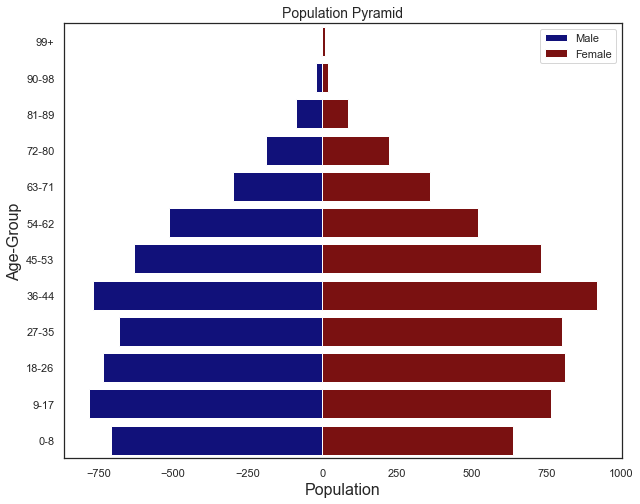

In [386]:
#plot age distribution of population
Male_size = [-708, -780, -733, -682, -768, -631, -513, -298, -189, -89, -22, -5]
Female_size = [636, 765, 813, 802, 917, 731, 520, 360, 222, 85, 18, 9]

Population_dict = {'Age': ['0-8', '9-17', '18-26','27-35','36-44','45-53','54-62','63-71','72-80','81-89','90-98','99+'],
                   
                   'Male': Male_size, 'Female': Female_size}

Population_df = pd.DataFrame( Population_dict  )

Class_of_Age = ['99+','90-98','81-89','72-80','63-71','54-62','45-53','36-44','27-35','18-26','9-17','0-8']

#define figure size
plt.figure(figsize=(10,8))
#display barplots
sns.set_theme(style="white")
bar=sns.barplot(x='Male', y='Age', data=Population_dict, order = Class_of_Age, color='darkblue', label = 'Male')
bar= sns.barplot(x='Female', y='Age', data=Population_dict, order=Class_of_Age, color='darkred', label = 'Female')
bar.legend(loc="best")
plt.ylabel('Age-Group', size=16)
plt.xlabel('Population', size=16)
plt.title("Population Pyramid", size=14)
plt.show()

###  Age against Marital Status with respect to Age_Group

In [387]:
import numpy as np #Data preprocessing package 
import pandas as pd #Data preprocessing Package 
import matplotlib.pyplot as plt #visualization package 
import seaborn as sns #visualization package 

In [388]:
# Creating a new Data attribute that will categorise our population: "Age_group"
df['Age_group'] = pd.cut(df['Age'],bins=[0, 18, 25, 45, 65, 122], labels=['Children', '18-25', '26-45', '45-65', 'Aged'])

Text(0.5, 1.0, 'Age against Marital Status with respect to Age_Group')

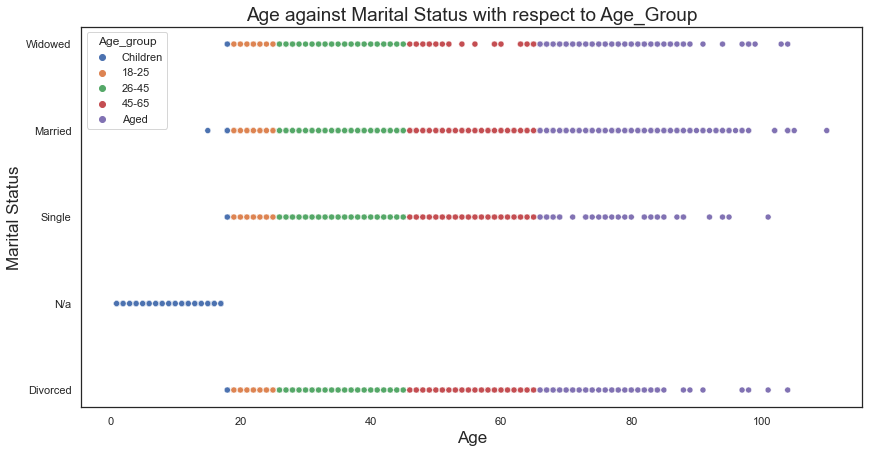

In [389]:
# figure size definition
plt.figure(figsize=(14,7))

#Create scatterplot
sns.scatterplot(data= df, x= 'Age', hue= 'Age_group', y= 'Marital Status')
plt.xlabel('Age', size=17)
plt.ylabel('Marital Status', size=17)
plt.title('Age against Marital Status with respect to Age_Group', size=19)

### EMPLOYMENT CATEGORY  BY AGE GROUP

Text(0.5, 1.0, 'Employment categor by Age Group')

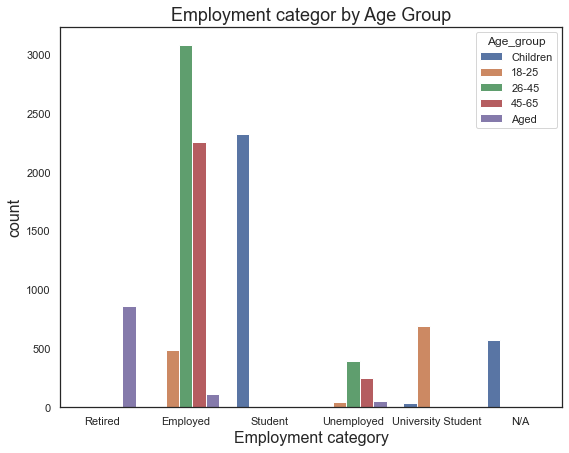

In [390]:
#define figure size
plt.figure(figsize=(9,7))
#display countplot
sns.countplot(data = df, x = 'Employment category',hue = 'Age_group')
plt.xlabel('Employment category', size=16)
plt.ylabel('count', size=16)
plt.title('Employment categor by Age Group', size=18)

Text(0.5, 1.0, 'Commuters')

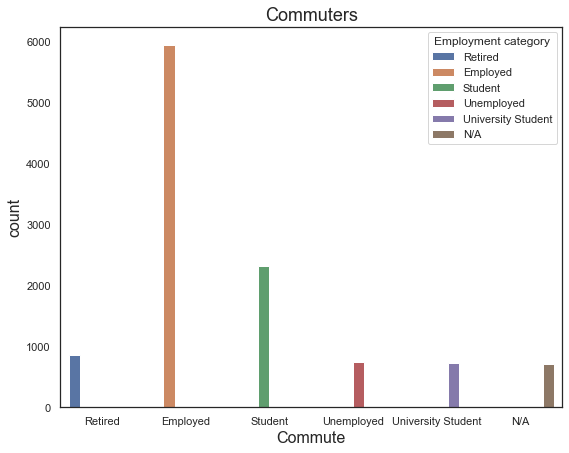

In [391]:
#define figure size
plt.figure(figsize=(9,7))
#display countplot
sns.countplot(data = df, x = 'Employment category', hue = 'Employment category')
plt.xlabel('Commute', size=16)
plt.ylabel('count', size=16)
plt.title('Commuters', size=18)

### Age against Religion 

Text(0.5, 1.0, 'Age Against Religion')

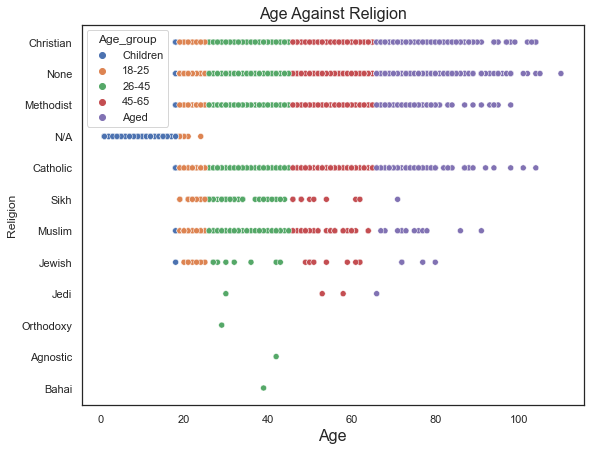

In [392]:
#Figure size definition 
plt.figure(figsize=(9,7))

#Create scatterplot
age_ = sns.scatterplot(data= df, x= 'Age', y= 'Religion', hue= 'Age_group')
plt.xlabel('Age', size=16)
plt.title('Age Against Religion', size=16)

In [393]:
#Statiscal Description by groupby method 
df.groupby('Religion')['Age'].describe(percentiles=[])

,count,mean,std,min,50%,max
Religion,,,,,,
Agnostic,1.0,42.000000,NaN,42.0,42.0,42.0
Bahai,1.0,39.000000,NaN,39.0,39.0,39.0
Catholic,1158.0,41.693437,15.010920,18.0,41.0,104.0
Christian,2426.0,48.690025,18.112124,18.0,49.0,104.0
Jedi,4.0,51.750000,15.456929,30.0,55.5,66.0
Jewish,29.0,42.689655,19.411159,18.0,42.0,80.0
Methodist,768.0,44.985677,16.751456,18.0,42.5,98.0
Muslim,142.0,38.492958,16.760620,18.0,32.0,91.0
N/A,2947.0,9.083135,5.232368,0.0,9.0,24.0


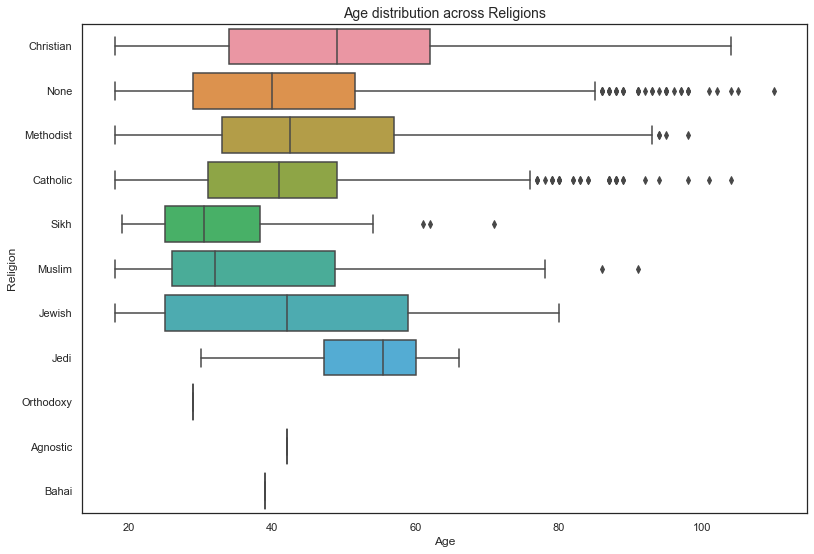

In [394]:
#Age Median and Mean distribution across all Religions Graph 
#Figure size definition 
plt.figure(figsize=(13,9))
sns.set_theme(style = "white")
#Show boxplot
Plot = sns.boxplot( x=df_Adults['Age'], y = df_Adults['Religion'], data = df_Adults  )
plt.title('Age distribution across Religions', size= 14)
plt.show()

In [395]:
df 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment category,Age_group
0,1,April Lodge,Brett,Webb,69,Head,Widowed,Male,Retired Customer service manager,None,Christian,Retired,Aged
1,2,April Lodge,Matthew,Hill,82,Head,Married,Male,Retired English as a second language teacher,None,Christian,Retired,Aged
2,2,April Lodge,Cheryl,Hill,80,Wife,Married,Female,Retired IT technical support officer,None,Christian,Retired,Aged
3,3,April Lodge,Louis,Scott,33,Head,Married,Male,Control and instrumentation engineer,None,None,Employed,26-45
4,3,April Lodge,Shannon,Scott,29,Wife,Married,Female,"Psychologist, prison and probation services",None,None,Employed,26-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,1,Williams Hold,Mark,Holmes,53,Lodger,Single,Male,Chief Strategy Officer,None,Christian,Employed,45-65
11292,1,Williams Hold,Tony,Field,33,Lodger,Widowed,Male,"Therapist, art",None,Catholic,Employed,26-45
11293,1,Williams Hold,Melanie,Roberts,59,Lodger,Single,Female,Marketing executive,None,Christian,Employed,45-65
11294,1,Williams Hold,Sally,Chapman,53,Lodger,Single,Female,Medical physicist,None,Christian,Employed,45-65


In [396]:
df_Adults = df[df["Age"]>=18] #Adult Dataframe 
df_Children = df[df["Age"]<18] #Children Dataframe 

In [397]:
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment category,Age_group
0,1,April Lodge,Brett,Webb,69,Head,Widowed,Male,Retired Customer service manager,None,Christian,Retired,Aged
1,2,April Lodge,Matthew,Hill,82,Head,Married,Male,Retired English as a second language teacher,None,Christian,Retired,Aged
2,2,April Lodge,Cheryl,Hill,80,Wife,Married,Female,Retired IT technical support officer,None,Christian,Retired,Aged
3,3,April Lodge,Louis,Scott,33,Head,Married,Male,Control and instrumentation engineer,None,None,Employed,26-45
4,3,April Lodge,Shannon,Scott,29,Wife,Married,Female,"Psychologist, prison and probation services",None,None,Employed,26-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,1,Williams Hold,Mark,Holmes,53,Lodger,Single,Male,Chief Strategy Officer,None,Christian,Employed,45-65
11292,1,Williams Hold,Tony,Field,33,Lodger,Widowed,Male,"Therapist, art",None,Catholic,Employed,26-45
11293,1,Williams Hold,Melanie,Roberts,59,Lodger,Single,Female,Marketing executive,None,Christian,Employed,45-65
11294,1,Williams Hold,Sally,Chapman,53,Lodger,Single,Female,Medical physicist,None,Christian,Employed,45-65


## FURTHER ANALYSIS 

In [398]:
#import pandas as pd 

In [399]:
pip install pandas-profiling[notebook]

Note: you may need to restart the kernel to use updated packages.


In [400]:
import pandas as pd
from pandas_profiling import ProfileReport

In [401]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## DEMOGRAPHY 

In [402]:
#Recall the children and Adult Dataframe by Age and Gender 
df_Male = df[df["Gender"] =='Male'] #Male Dataframe
df_Female = df[df["Gender"] =='Female'] #Female Dataframe 
df_Adults = df[df["Age"]>=18] #Adult Dataframe 
df_Children = df[df["Age"]<18] #Children Dataframe 

'''Total population of the Moderately sized Town'''  
pop_Total  = len(df)


''' Population by Age category'''
df_Adults = df[df["Age"]>=18] #Adult Dataframe 
df_Children = df[df["Age"]<18] #Children Dataframe 

#Adult population  
pop_Adults = len(df_Adults)

#percentage population of adults in the town
percent_Adults_pop = (pop_Adults/pop_Total)*100 

#Children Population 
pop_children = len(df_Children)

#Children % Population 
percent_Children_pop = (pop_children/pop_Total)*100 


''' Population by Gender'''

df_Male = df[df["Gender"] =='Male'] #Male Dataframe
df_Female = df[df["Gender"] =='Female'] #Female Dataframe 

#Female Population 
pop_female = len(df_Female)

#Female % Population
percent_female_pop = (pop_female/pop_Total)*100 

#Male Population
pop_male = len(df_Male)

#Female % Population
percent_male_pop = (pop_male/pop_Total)*100


'''AGE CLASS'''
df_Adults = df[df["Age"]>=18] #Adult Dataframe 
df_Children = df[df["Age"]<18] #Children Dataframe 

children = df_Children
__18_to_25 = df_Adults[df_Adults['Age'] < 26]
__26_to_45 = df_Adults[(df_Adults['Age'] > 25) & (df_Adults['Age'] < 46)]
__46_to_65 = df_Adults[(df_Adults['Age'] > 45) & (df_Adults['Age'] < 66)]
Aged = df_Adults[df_Adults['Age'] > 65]

# % population by Age group 
percent__18_to_25 = (len(__18_to_25)/ pop_Total)*100 
percent__26_to_45 = (len(__26_to_45)/pop_Total)*100 
percent__46_to_65 = (len(__46_to_65)/pop_Total)*100 
Aged_percent = (len(Aged)/pop_Total)*100 


'''AGE CLASS BY GENDER'''
df_Male = df[df["Gender"] =='Male'] #Male Dataframe
df_Female = df[df["Gender"] =='Female'] #Female Dataframe 

Female_children = df_Female[df_Female['Age'] <18]
Female__18_to_25 =df_Female[(df_Female['Age'] > 17) & (df_Female['Age'] < 26)]
Female__26_to_45 = df_Female[(df_Female['Age'] > 25) & (df_Female['Age'] < 46)]
Female__46_to_65 = df_Female[(df_Female['Age'] > 45) & (df_Female['Age'] < 66)]
Aged_Female = df_Female[df_Female['Age'] > 65]

Male_children = df_Male[df_Male['Age'] <18]
Male__18_to_25 = df_Male[(df_Male['Age'] > 17) & (df_Male['Age'] < 26)]
Male__26_to_45 = df_Male[(df_Male['Age'] > 25) & (df_Male['Age'] < 46)]
Male__46_to_65 = df_Male[(df_Male['Age'] > 45) & (df_Male['Age'] < 66)]
Aged_Male = df_Male[df_Male['Age'] > 65]


'''Marital Category '''

Marraigeable_age = df[df['Age'] >= 16]
percent_Marraigeable_age = (len(Marraigeable_age)/pop_Total)*100


# Married Class 
df_Married = df[df['Marital Status']== 'Married']
df_Married_Female = df_Married [df_Married ['Gender']== 'Female']
df_Married_Male = df_Married [df_Married ['Gender']== 'Male']
percent_Married = (len(df_Married)/pop_Total)* 100


# Divorced Class 
df_divorced = df[df['Marital Status']== 'Divorced']
df_divorced_Female = df_divorced[df_divorced['Gender']== 'Female']
df_divorced_Male = df_divorced[df_divorced['Gender']== 'Male']
percent_divorced  = (len(df_divorced)/pop_Total)* 100

#Single Class
df_Single = df[df['Marital Status']== 'Single']
df_Female_Single = df_Single[df_Single['Gender']== 'Female']
df_Male_Single = df_Single[df_Single['Gender']== 'Male']
percent_Single = (len(df_Single)/pop_Total)* 100


#Widowed Class
df_Widowed = df[df['Marital Status']== 'Widowed']
df_Female_widowed = df_Widowed[df_Widowed['Gender']== 'Female']
df_Male_widowed = df_Widowed[df_Widowed['Gender']== 'Male']
percent_Widowed = (len(df_Widowed)/pop_Total)* 100



In [403]:

Category_len = [len(__18_to_25), len(__26_to_45), len(__46_to_65), len( Aged)] 
Female_Children_len= [len(Female_children), len(Female__18_to_25), len(Female__26_to_45), len(Female__46_to_65), len(Aged_Female) ]
Male_Children_len = [len(Male_children), len(Male__18_to_25), len(Male__26_to_45), len(Male__46_to_65), len( Aged_Male)]
print(Category_len )
print(Female_Children_len )
print(Male_Children_len)

[1398, 3476, 2497, 1036]
[1400, 729, 1891, 1289, 566]
[1489, 669, 1585, 1208, 470]


In [404]:
Mean_Age = df["Age"].mean()
Max_Age = df["Age"].max()

In [405]:
print(f"Town population: {pop_Total}")
print("--------------------------------------------------------------------------")
print(f"The maximum Age:  {Max_Age}")
print(f"The mean Age:  {Mean_Age}")
print("--------------------------------------------------------------------------")
print(f"The Female population: {pop_female}" ) 
print(f"The %Female population: {percent_female_pop}")
print(f"The Male Population: {pop_male}" ) 
print(f"The %Male Population: {percent_male_pop}")
print("--------------------------------------------------------------------------")
print(f"The %divorced population: {percent_divorced}")
print(f"The %Married population:{percent_Married}")
print(f"The %Single Population: {percent_Single}") 
print(f" The %widowed population: {percent_Widowed}") 
print("--------------------------------------------------------------------------")
print(f"The children population: {pop_children}")
print(f"the Adult Population: {pop_Adults}")
print(f"The %Children Population: {percent_Children_pop}")
print(f"The %Adult Population: {percent_Adults_pop}")
print("--------------------------------------------------------------------------")
print(f"The percentage makeup of the Age group (18 - 25): {percent__18_to_25 }")
print(f"The percentage makeup of the Age group (26 - 45: {percent__26_to_45 }")
print(f"The percentage makeup of the Age group (46 - 65): {percent__46_to_65 }")
print(f"The percentage makeup of the Aged group: {Aged_percent}")
print("--------------------------------------------------------------------------")
print("Married Female :" + str( len(df_Married_Female)))
print("Married Male :" + str( len(df_Married_Male)))
print("--------------------------------------------------------------------------")
print("Divorecd Male :" + str( len(df_divorced_Male)))
print("Divorecd Female :" + str( len(df_divorced_Female)))
print("--------------------------------------------------------------------------")
print("Female single :" + str( len(df_Female_Single)))
print("Male single :" + str( len(df_Male_Single)))
print("--------------------------------------------------------------------------")
print("Male Widowed :" + str( len(df_Male_widowed )))
print("Female Widowed :" + str( len(df_Female_widowed )))
print("--------------------------------------------------------------------------")

Town population: 11296
--------------------------------------------------------------------------
The maximum Age:  110
The mean Age:  34.876947592067985
--------------------------------------------------------------------------
The Female population: 5875
The %Female population: 52.00956090651558
The Male Population: 5421
The %Male Population: 47.99043909348442
--------------------------------------------------------------------------
The %divorced population: 9.791076487252125
The %Married population:25.53116147308782
The %Single Population: 35.4284702549575
 The %widowed population: 3.6827195467422094
--------------------------------------------------------------------------
The children population: 2889
the Adult Population: 8407
The %Children Population: 25.57542492917847
The %Adult Population: 74.42457507082153
--------------------------------------------------------------------------
The percentage makeup of the Age group (18 - 25): 12.376062322946176
The percentage makeup of th

## BIRTH AND DEATH RATE 

In [406]:
#crude birth rate is the number of live births in a given year for every 1,000 people
babies = df_Children[df_Children['Age']==0]
nos_of_babies = len(babies)
crude_birth_rate = (nos_of_babies/pop_Total)*1000

#The number of live children per 1000 persons in the town 
crude_birth_rate = (len(babies)/pop_Total)*1000

#With the assumption that 5 years ago; population range will fall in this range 
Population_5yr_ago = len(df[df['Age']>4])

#Crude birth rate 5yr ago 
Crude_birth_rate_5yr_ago = (len(df_Children[df_Children['Age']==4])/Population_5yr_ago)*1000
print(f" The crude birth rate 5yrs ago: {Crude_birth_rate_5yr_ago} per 1000persons")
print (f" The present crude birth rate: {crude_birth_rate} per 1000persons" ) 
print (f" The present no of birth:  {nos_of_babies} ")  

 The crude birth rate 5yrs ago: 15.022675736961451 per 1000persons
 The present crude birth rate: 12.305240793201133 per 1000persons
 The present no of birth:  139 


In [407]:
'''Since our Max Age from our calculations above is 110 and the Age range for Aged group is 66 above; 
hence i will consider Aged range (66 - 110 ) for the death rate calculations;
Difference in last year death and recent year will give this value''' 
#calculating the death rate over the period of 1year and within the Aged class
#Death_over_1yr = Death over Age(66 to 110) minus  Death over Age(65 to 109) = past_Age - present_Age 

present_Age  = len (df[(df["Age"]>66) & (df["Age"]<=110)])
past_Age = len(df[(df["Age"]>=65) & (df["Age"]<=109)])
death = past_Age - present_Age 
death_rate = (death/pop_Total)*1000 
print(f"The death rate : {death_rate} per 1000 people")
print(f"The no of death: {death}")

The death rate : 11.862606232294617 per 1000 people
The no of death: 134


In [408]:
#future population of aged(5yrs) 
next_gen_aged = len(df[(df['Age'] >= 59) & (df['Age'] < 65)])

In [409]:
#Assumed constant death rate 
Death_rate_proj_5yrs = death * 5 
print(f" Projected date in 5yrs: {Death_rate_proj_5yrs}")

 Projected date in 5yrs: 670


## COMMUTERS 

In [410]:
#Commuters are those who travel from home and work 
#Commuters are those who travel between home and work on a regular basis (Market Business News, 2022). 
#A close look into the different employment category list, I discovered about 80% commute to the city which can be approximately categorized as the commuters; hence, the University student and the employed fall into the commuter class.

In [411]:
Econ_active_pop = df[(df['Age'] >= 15) & (df['Age'] < 65)] # Economical active group 
total_econ_active_pop = len(Econ_active_pop)

In [412]:
#Recall the employment category as a data attribute was created from the Occupation Data Column for simplicity
commuters_employed =  df[df["Employment category"]=='Employed']
Commuters_University_Student = df[df["Employment category"]=='University Student']
total_commuters = len(Commuters_University_Student) + len(commuters_employed)
percent_commuters_of_EcoActive = (total_commuters /len(Econ_active_pop))*100
percent_commuters_of_total_pop = (total_commuters /pop_Total)*100
print(f"The percentage commuters of economically active group: {percent_commuters_of_EcoActive}%")
print(f"The percentage commuters of total population: {percent_commuters_of_total_pop }%")

The percentage commuters of economically active group: 85.09388172180356%
The percentage commuters of total population: 58.976628895184135%


## RELIGION AFFILIATIONS  

In [413]:
#Statiscal Description of the Religion  by groupby method 
df.groupby('Religion')['Age'].describe(percentiles=[])

,count,mean,std,min,50%,max
Religion,,,,,,
Agnostic,1.0,42.000000,NaN,42.0,42.0,42.0
Bahai,1.0,39.000000,NaN,39.0,39.0,39.0
Catholic,1158.0,41.693437,15.010920,18.0,41.0,104.0
Christian,2426.0,48.690025,18.112124,18.0,49.0,104.0
Jedi,4.0,51.750000,15.456929,30.0,55.5,66.0
Jewish,29.0,42.689655,19.411159,18.0,42.0,80.0
Methodist,768.0,44.985677,16.751456,18.0,42.5,98.0
Muslim,142.0,38.492958,16.760620,18.0,32.0,91.0
N/A,2947.0,9.083135,5.232368,0.0,9.0,24.0


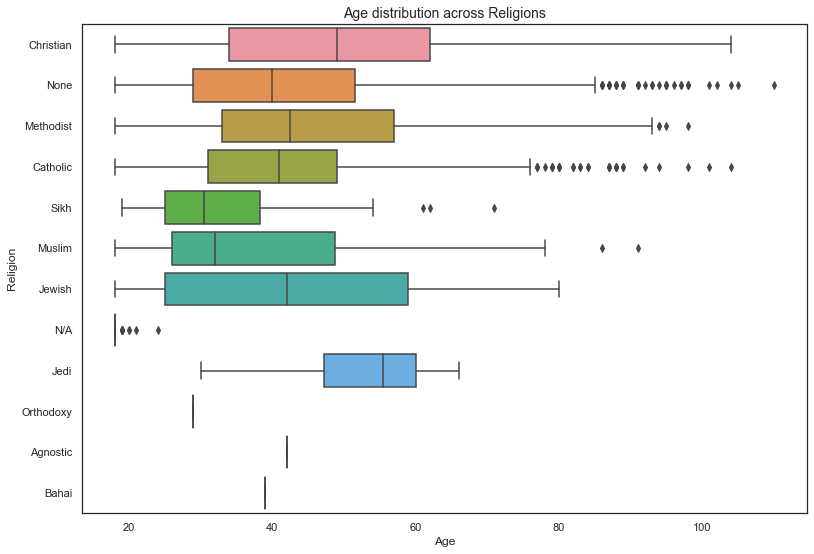

In [414]:
#Age Median and Mean distribution across all Religions Graph 
#Figure size definition 
plt.figure(figsize=(13,9))
sns.set_theme(style = "white")
#Show boxplot
Plot = sns.boxplot( x=df_Adults['Age'], y = df_Adults['Religion'], data = df_Adults  )
plt.title('Age distribution across Religions', size= 14)
plt.show()

## UNEMPLOYMENT TREND 


Unemployment levels measure the total number of people estimated to be unemployed while 
unemployment rates allow changes in the labour market to be interpreted in a wider context by 
allowing for changes in the population. The headline measure of unemployment for the UK is the
unemployment rate for those aged 16 and over. Unemployment rates are calculated, in accordance with 
international guidelines, as the number of unemployed people divided by
the economically active population (those in employment plus those who are unemployed ( ONS,2022)


In [415]:
#Determining the level of Unemployment accras the town 
percent_retired= (len(df[df['Employment category']== 'Retired'])/pop_Total)*100
percent_unemployed= (len(df[df['Employment category']== 'Unemployed'])/pop_Total)*100
percent_university_studt= (len(df[df['Employment category']== 'University Student'])/pop_Total)*100
percent_chiild= (len(df[df['Employment category']== 'N/A'])/pop_Total)*100
percent_Student= (len(df[df['Employment category']== 'Student'])/pop_Total)*100
percent_employed = (len(df[df['Employment category']== 'Employed'])/pop_Total)*100

The headline employment rate is calculated by dividing the employment level for those aged from 16 to 64 by the population for that age group (ONS, 2022)

In [416]:
print(f" The retired percentage: {percent_retired}")
print(f" The unemployed percent: {percent_unemployed}")
print(f" The university student percent: {percent_university_studt}")
print(f" The child percent: {percent_chiild}")
print(f" The  Student percent : {percent_Student}")
print(f" The  employed percent : {percent_employed}")

 The retired percentage: 7.64872521246459
 The unemployed percent: 6.52443342776204
 The university student percent: 6.409348441926345
 The child percent: 6.303116147308782
 The  Student percent : 20.547096317280452
 The  employed percent : 52.567280453257794


In [417]:
Employed_Population = len(df[(df['Age'] > 16) & (df['Employment category'] == 'Employed')])
Unemployed_Population  = len(df[(df['Age'] > 16) & (df['Employment category'] == 'Unemployed')])


Rate_of_Unemployment = (Unemployed_Population/(Employed_Population + Unemployed_Population))*100
print(f" The rate of Unemployed Population in the town: {Rate_of_Unemployment}")
#Based on ONS analytics on Unemployment rate in tha third quarter of 2022, i would conclude this is a high level of Unemployment
#as it is almost thrice estimated figure 


 The rate of Unemployed Population in the town: 11.041198501872659


Text(0.5, 1.0, 'Employment category by Age Group')

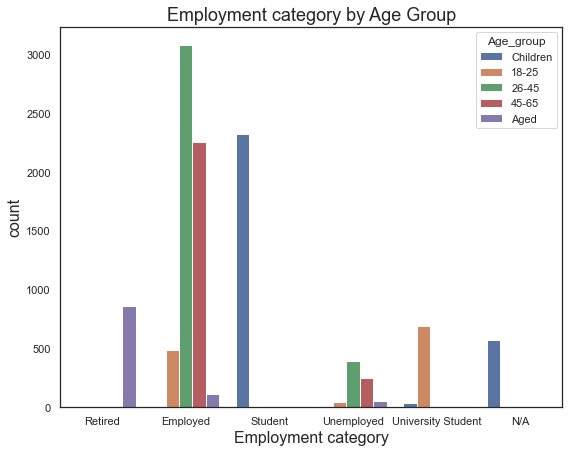

In [418]:
#define figure size
plt.figure(figsize=(9,7))
#display countplot
sns.countplot(data = df, x = 'Employment category',hue = 'Age_group')
plt.xlabel('Employment category', size=16)
plt.ylabel('count', size=16)
plt.title('Employment category by Age Group', size=18)

## INFIRMITY RATE 

In [419]:
#Infirmity equal None infers there is present on infirmity in the person; hence need to filter populate without infirmity 
No_of_people_with_Infirmity = len(df[df['Infirmity'] != 'None'])
Percentage_infirmity = (No_of_people_with_Infirmity/pop_Total)*100
print(f" %no of populate with infirmity: {Percentage_infirmity}%")

 %no of populate with infirmity: 0.6639518413597734%


## SCHOOL CHILDREN GROWTH RATE 

In [420]:
'''To calculate the Population Growth (PG) we find the difference (subtract) between the initial population and 
the population at Time 1, then divide by the initial population and multiply by 100'''

#past population of children(a year ago)  in the Age bracket (1 - 16)
past_children = len(df_Children[(df_Children['Age'] >= 1) & (df_Children['Age'] <= 17)])

#present population of children in the Age bracket (0 - 16)
present_children  = len(df_Children[(df_Children['Age'] >= 0) & (df_Children['Age'] <= 16)])


#Growth rate of children 
Children_pop_growth = present_children - past_children
Children_pop_growthrate_per_year = ((present_children - past_children)/past_children)* 100

#Project growth in the next year, 5th year and 10yh year 
first_yr_proj = present_children*((1 + (Children_pop_growthrate_per_year/100))**1)
second_yr_proj= present_children*((1 + (Children_pop_growthrate_per_year/100))**2)
Third_yr_proj= present_children*((1 + (Children_pop_growthrate_per_year/100))**3)
Fourth_yr_proj = present_children*((1 + (Children_pop_growthrate_per_year/100))**4)
fifthtenth_yr_proj = present_children*((1 + (Children_pop_growthrate_per_year/100))**5)
Tenth_yr_proj = present_children*((1 + (Children_pop_growthrate_per_year/100))**10)

In [421]:
print(f"The growth reduces by {Children_pop_growth} per year ")
print(f'The children population growth rate  is {Children_pop_growthrate_per_year} which infers a negative growth rate' )

The growth reduces by -38 per year 
The children population growth rate  is -1.3818181818181818 which infers a negative growth rate


In [422]:
#Based on this trend there is reduction by the year; however, the rate isnt significant  
print(f"The first year,2nd, 3rd, 4th, 5th and 10th yr projected growth is {first_yr_proj},{second_yr_proj},{Third_yr_proj}, {fifthtenth_yr_proj}, {Tenth_yr_proj} ")

The first year,2nd, 3rd, 4th, 5th and 10th yr projected growth is 2674.525090909091,2637.5680169256198,2601.12162250992, 2529.732743239617, 2359.715247868229 


In [423]:
#Creating a dictionary for this trend inorder to create a dataframe with table showing the negative trend  

In [424]:
Sch_children_dict = {  "year1_Projection":2674.525090909091, 
               "year2_Projection": 2637.5680169256198,
               "year3_Projection": 2601.12162250992, 
              " year4_Projection": 2529.732743239617,
              " year10_Projection": 2359.715247868229 }

In [425]:
dff = pd.DataFrame(Sch_children_dict, index=["School Children Yearly Growth "]).T
dff

,School Children Yearly Growth
year1_Projection,2674.525091
year2_Projection,2637.568017
year3_Projection,2601.121623
year4_Projection,2529.732743
year10_Projection,2359.715248


## EMERGENCIES 

The percentage growth change from one period to another is calculated using the Uoregon approach: Percentage change = ((Present Value  - Past Value)/Past Value) x 100 (Uoregon, 2022). 

In [426]:
'''% growth rate (yearly) for the population'''
#Present population count
present_pop = pop_Total

#past population (1yr ago) using 110 being the maximum age
past_pop = len(df[(df['Age'] > 0) & (df['Age'] <=110)])

GR_totalpop = ((present_pop - past_pop)/past_pop)* 100
print(f'The growth rate in percentage for the population is {GR_totalpop}')

The growth rate in percentage for the population is 1.245854620417675


In [427]:
#Projected total population count in 1yr 
population_proj_1yr = pop_Total*((1 + (GR_totalpop/100))**1)
print(f" 1yr projected total Population: {population_proj_1yr}")

 1yr projected total Population: 11436.731737922382


In [428]:
'''% growth rate (yearly) for the children who are most vunerable (Age 0 -5)'''
#Present vulnerable children count
present_pop_children = len(df[(df['Age'] >= 0) & (df['Age'] <=5)])

#past vulnerable children (1yr ago) 
past_pop_children = len(df[(df['Age'] >=1) & (df['Age'] <=4)])

GR_children = ((present_pop_children - past_pop_children)/past_pop)* 100
print(f'The growth rate in percentage for the vulnerable children is {GR_children}')

The growth rate in percentage for the vulnerable children is 2.5365241552388635


In [429]:
#Projected vulnerable children in 1yr 
Vulnerable_children_proj_1yr = present_pop_children*((1 + (GR_children/100))**1)
print(f" 1yr vulnerable children projected Population: {Vulnerable_children_proj_1yr}")

 1yr vulnerable children projected Population: 877.7126467688447


In [430]:
'''birth rate wrt pregnancies'''

#crude_birth_rate(projected) = (crude_birth_rate/1000) projected population
birth_future = (crude_birth_rate/1000)*population_proj_1yr
print(f" Expected no of pregnancies in the vulnerability class is {birth_future}")
crude_birth_rate 

 Expected no of pregnancies in the vulnerability class is 140.7317379223806


12.305240793201133

In [431]:
'''Aged count in the Vulnerability class '''
present_Aged  = len (df[(df["Age"]>66) & (df["Age"]<=110)]) #Maximum age as 110 based on demography 
past_Age = len(df[(df["Age"]>=65) & (df["Age"]<=109)]) #1yr ago as reference 
Aged_population_rate = ((present_Aged  - past_Age)/past_Age)*100
Aged_projection_1yr = present_Aged*((1 + (Aged_population_rate/100))**1)
Aged_population_rate

-12.14868540344515

In [432]:
total_vulnerables = ((birth_future + Vulnerable_children_proj_1yr  + Aged_projection_1yr)/ population_proj_1yr)* 100

In [433]:
print(f" The projected percentage of vulnerables of total population resulting to emergency in the town in the next 1year: {total_vulnerables}%") 

 The projected percentage of vulnerables of total population resulting to emergency in the town in the next 1year: 16.34840849621519%


## OCCUPANCY RATE 

In [434]:
#A new Data column created to give us the number of occupancy with a person being an household   
df['Ocupancy']=df.apply(lambda x: len(df[(df["Street"]==x["Street"]) & (df["House Number"] ==x["House Number"])]), axis = 1)

In [435]:
df[['Ocupancy']]

,Ocupancy
0,1
1,2
2,2
3,5
4,5
...,...
11291,12
11292,12
11293,12
11294,12


In [436]:
#Median occupancy  
df['Ocupancy'].median()

4.0

In [437]:
#This gives the number of household with Occupancy above 4 
len(df[(df["Ocupancy"]>4) & (df["Relationship to Head of House"]=="Head")])


754

In [438]:
#There are 3501 household 
len(df[df["Relationship to Head of House"]=="Head"]) 

3501

On the Unoccupied Plot of Land, below are recommendations:


Low Density Houses

Emergency building

Train station
What should be invested on:

End of Life care

Employment and Training